# Introduction

A company has developed a new e-commerce web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product.
The main goal of this project was to understand the results of an A/B test run by the website and provide statistical and practical interpretation on the test results

# Part I - Probability


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

random.seed(42)

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(4)             # read the ab_data.cvs

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0


In [3]:
df.shape[0]       #number of rows dataset Q1

294478

In [4]:
df.user_id.nunique()        #number of unique users in the dataset Q1

290584

In [5]:
df.converted.mean()*100      # proportion of users converted Q1

11.96591935560551

In [6]:
TreatOld = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
NewCntrol = df.query("group == 'control' and landing_page == 'new_page'").shape[0]
misalignment = TreatOld + NewCntrol
misalignment            # The number of times the new_page and treatment don't match Q1proportion of users converted Q1

3893

In [7]:
df.isnull().sum()  # Do any of the rows have missing values? Q1

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)
df.info()           # remove the rows where the landing_page and group columns don't match Q2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [9]:
df.to_csv('ab_data2.csv', index=False)

In [10]:
df2 = pd.read_csv('ab_data2.csv')

In [11]:
df2.user_id.nunique() # The number of unique ids in df2 Q3

290584

In [12]:
df2[df2.user_id.duplicated(keep=False)].user_id  # The user_id for the non-unique id in df2 Q3

1876    773192
2862    773192
Name: user_id, dtype: int64

In [13]:
df2[df2.user_id.duplicated(keep=False)]  # To solve the rest of Q3

,user_id,timestamp,group,landing_page,converted
1876,773192,37:58.8,treatment,new_page,0
2862,773192,55:59.6,treatment,new_page,0


In [27]:
ConProp = df2.converted.mean() 
print('The Probability of converting regardless of page {}'.format(ConProp))# Probability of converting regardless of page Q4

The Probability of converting regardless of page 0.11959667567149027


In [43]:
ConPropControl = df2.query("group == 'control'").converted.mean() 
print('individual received the control page, the probability of converting {}'.format(ConPropControl))
# Given an individual received the control page, the probability of converting Q4

individual received the control page, the probability of converting 0.1203863045004612


In [44]:
ConPropTrearment = df2.query("group == 'treatment'").converted.mean()
print('individual received the treatment, the probability of converting {}'.format(ConPropTrearment))
# Given that an individual received the treatment, the probability of converting Q4

individual received the treatment, the probability of converting 0.11880724790277405


In [45]:
ConPropNewPage = df2.query("landing_page == 'new_page'").shape[0] / df2.landing_page.shape[0]
print('The probability of receiving the new page {}'.format(ConPropNewPage))
# The probability of receiving the new page Q4

The probability of receiving the new page 0.5000636646764286


# Conclusions of part 1 (Probability)

The results of both Treatment and control pages so close .. so we can't make sure if the new page is more to leads than old page 



# Part II - A/B Test

1. It is assumed that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%. The null and alternative hypotheses are (p_(old) and p_(new), which are the converted rates for the old and new pages):


H_0 : p_(new) - p_(old)<=H_1 : p_(new)- p_(old) >= 0

2. It is assumed under the null hypothesis, p_(new) and p_(old) both have "true" success rates equal to the converted success rate regardless of page - that is p_(new) and p_(old) are equal. Furthermore, it is assumed they are equal to the converted rate in ab_data.csv regardless of the page
 

In [32]:
p_new = ConProp
p_new  # p_new under the null Q5

0.5000636646764286

In [33]:
p_old = ConProp
p_old  # p_old under the null Q5

0.5000636646764286

In [82]:
n_new = df2[df2.landing_page == 'new_page'].shape[0]
n_new  # n_new Q5

145311

In [83]:
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_old # n_old Q5

145274

In [47]:
NewPage = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
NewPage.mean()


0.49913633517077166

In [48]:
OldPage = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
OldPage.mean()


0.4998485620276168

In [49]:
p_diff = NewPage.mean() - OldPage.mean()

p_diff  #p_new - p_old under the null Q5

-0.0007122268568451329

In [84]:
p_diffs = []
for _ in range(10000):
    NewPage = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new])
    OldPage = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old])
    p_diffs.append(NewPage.mean() - OldPage.mean())

KeyboardInterrupt: 

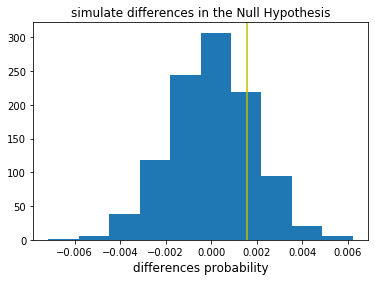

In [85]:
obs_diff = ConPropControl - ConPropTrearment
p_diffs = np.asarray(p_diffs)
plt.hist(p_diffs)
plt.title("simulate differences in the Null Hypothesis", fontsize=12)
plt.xlabel("differences probability", fontsize=12)
plt.axvline(obs_diff, color='y');

In [86]:
(p_diffs >= obs_diff).mean()
p_diffs           # convert p_diffs into array 

array([-0.00055393, -0.00231582,  0.00301086, ..., -0.00242585,
        0.00170405,  0.00045033])

In [87]:
ConvertOld = df2.query('group == "control" & converted == 1')['converted'].count()
ConvertNew = df2.query('group == "treatment" & converted == 1')['converted'].count()
ConvertOld, ConvertNew, n_old, n_new

(17489, 17264, 145274, 145311)

In [88]:
np.std(NewPage)  # std of the sampling distribution for new page

0.49999391327079845

In [89]:
np.std(OldPage) # std of the sampling distribution for old page

0.4999972479299054

In [90]:
np.std(obs_diff) # std  of distribution for difference in means

0.0

In [91]:
ConvertNew - ConvertOld

-225

In [92]:
n_new = df2.query('landing_page == "new_page"').count()[0]
print('The count number of rows where have new page in landing page {} '.format(n_new))

The count number of rows where have new page in landing page 145311 


In [93]:
n_old = df2.query('landing_page == "old_page"').count()[0]
print('The count number of rows where have old page in landing page {} '.format(n_old))

The count number of rows where have old page in landing page 145274 


In [94]:
z_score, p_value = sm.stats.proportions_ztest([ConvertNew, ConvertOld], [n_new, n_old], alternative='larger')
z_score, p_value

(-1.3116075339133115, 0.905173705140591)

In [95]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0


# Conclusions of part 2 (A/B TEST)

again , the both pages is very close .. so we can't be sure" 
p-value (in our case it is the probability of not observing any difference between convertion rates of control and treatment groups if the null hypothesis is true). In order to reject the null hypothesis" ," the p-value should be below our α level of 0.05 (agreed level of 5% chance of committing a Type I error if the null is true). In our case, the p-value calculated is 0.9, too high for us to be able to reject the null hypothesis "


We could also use a built-in to achieve similar results. Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance

A z-score is the number of standard deviations from the mean a data point is "obs_diff"

# Part III - A regression approach

1. In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.
a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?
Since we have a yes/no or binary type category, Logistic regression is the model that we need to use in this case for regression.
b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [96]:
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,11:48.6,control,old_page,0,1,0,1
1,804228,01:45.2,control,old_page,0,1,0,1
2,661590,55:06.2,treatment,new_page,0,1,1,0


In [97]:
LogitMod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
Results = LogitMod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [98]:
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0


In [99]:
Results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sun, 27 Oct 2019   Pseudo R-squ.:               8.085e-06
Time:                        01:31:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [105]:
df_countries = pd.read_csv('./countries.csv')
dfNew = df_countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
dfNew.head(4)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page
user_id,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0
630001,US,16:42.6,treatment,new_page,1,1,1,0
630002,US,20:56.4,control,old_page,0,1,0,1
630003,US,09:31.5,treatment,new_page,0,1,1,0


In [103]:
dfNew.country.unique()    # cheack unique value

array(['US', 'UK', 'CA'], dtype=object)

In [106]:
dfNew[['ca', 'uk', 'us']] = pd.get_dummies(dfNew['country'])
dfNew.head(4)  # statsmodels to import your regression model

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us
user_id,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,0,1
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,0,1
630002,US,20:56.4,control,old_page,0,1,0,1,0,0,1
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,0,1


In [107]:
LogMod = sm.Logit(dfNew['converted'], dfNew[['intercept', 'uk', 'us']])
Result = LogMod.fit()
Result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sun, 27 Oct 2019   Pseudo R-squ.:               1.521e-05
Time:                        01:44:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
uk             0.0507      0.028      1.786      0.074      -0.005       0.106
us             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [108]:
dfNew.head(4)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us
user_id,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,0,1
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,0,1
630002,US,20:56.4,control,old_page,0,1,0,1,0,0,1
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,0,1


In [109]:
dfNew['us_page'] = dfNew['us'] * dfNew['ab_page']
dfNew['uk_page'] = dfNew['uk'] * dfNew['ab_page']
dfNew.head(4)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us,us_page,uk_page
user_id,,,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,0,1,1,0
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,0,1,1,0
630002,US,20:56.4,control,old_page,0,1,0,1,0,0,1,0,0
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,0,1,1,0


In [110]:
LogMod = sm.Logit(dfNew['converted'], dfNew[['intercept', 'ab_page', 'us', 'uk', 'us_page', 'uk_page']])
Result = LogMod.fit()
Result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sun, 27 Oct 2019   Pseudo R-squ.:               3.483e-05
Time:                        03:01:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
us             0.0175      0.038      0.465      0.642      -0.056       0.091
uk             0.0118      0.040      0.296      0.767      -0.066       0.090
us_page        0.0469      0.054      0.872      0.383      -0.059       0.152
uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

In [111]:
dfNew.head(4)

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,ca,uk,us,us_page,uk_page
user_id,,,,,,,,,,,,,
630000,US,26:06.5,treatment,new_page,0,1,1,0,0,0,1,1,0
630001,US,16:42.6,treatment,new_page,1,1,1,0,0,0,1,1,0
630002,US,20:56.4,control,old_page,0,1,0,1,0,0,1,0,0
630003,US,09:31.5,treatment,new_page,0,1,1,0,0,0,1,1,0


# 
What is the p-value associated with ab_page? Why does it differ from the value you found in Part II?

a-The p-value is 0.190. This is because the Logit Regression is based on a two-tailed test. So,  is still greater then 0.05 we still cannot reject the null hypothesis

So , we along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. 

# Conclusions of part 3 regression approach

from the  p-values for all variables "all higher than 0.05" there is no effects interactions between page and country  on conversion

# Project Conclusions 

Conclusions
from the whole study and general we are not very sure if the new page is more suggestion than old page 

 from the analysis result , I would bias me toward suggesting to drop the new page as not bringing much value and focus on NEW something else